In [ ]:
conda install tensorflow

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img_array = cv2.imread('archive/train/0/Training_3908.jpg')
img_array.shape

(48, 48, 3)

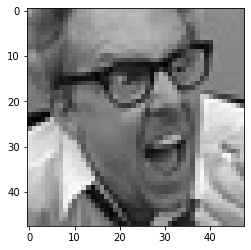

In [7]:
plt.imshow(img_array)